Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load data file

In [2]:
data = pd.read_excel("/content/drive/MyDrive/data/Simmons.xls")
data.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [3]:
data.describe() # it is used to get some statistical detail

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [4]:
data["Coupon"].unique() # It gives unique value in particular column

array([0, 1])

In [5]:
data["Coupon"].value_counts()

,count
Coupon,
0,60
1,40


In [6]:
60 / 100 # Using Baseline method

0.6

Build the model

import labraries

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

splitting the dataset

In [8]:
x = data[["Card", "Spending"]]
y = data[["Coupon"]].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
len(x_train), len(y_train), len(x_test), len(y_test)

(75, 75, 25, 25)

Fit the model

In [10]:
Lreg = LogisticRegression(solver="lbfgs")
Lreg.fit(x_train, y_train.ravel()) # ravel() will return 1D array with all the input-array elements

LogisticRegression()

Predicts the values of dependent variable using test and training set of independent variable

In [12]:
LogisticRegression?

In [11]:
y_predict = Lreg.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0])

In [13]:
y_predict_train = Lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0])

In [14]:
y_prob_train = Lreg.predict_proba(x_train)[:, 1]
y_prob_train.reshape(1, -1)

array([[0.49618288, 0.32880558, 0.44331124, 0.33320598, 0.41459023,
        0.32890093, 0.39748721, 0.66918819, 0.25845659, 0.63670531,
        0.29274878, 0.28467622, 0.51588732, 0.41994733, 0.24343741,
        0.5285169 , 0.47961622, 0.52801323, 0.3319115 , 0.27458272,
        0.49175558, 0.6325985 , 0.24691508, 0.47090915, 0.27842841,
        0.41661746, 0.36154674, 0.49971207, 0.23623138, 0.37863254,
        0.48810439, 0.28878446, 0.28564488, 0.3723519 , 0.65307608,
        0.43809375, 0.33638085, 0.40409358, 0.23432709, 0.37285684,
        0.49971207, 0.39771263, 0.32880558, 0.25783611, 0.47390468,
        0.4288115 , 0.26521947, 0.33320598, 0.54682415, 0.45447877,
        0.44323889, 0.49652615, 0.60064794, 0.3899266 , 0.49150494,
        0.27415269, 0.27786462, 0.67461641, 0.28195703, 0.48594587,
        0.38631757, 0.31373574, 0.42812388, 0.27419567, 0.44373772,
        0.41632126, 0.64198463, 0.65707806, 0.44070086, 0.28195703,
        0.40215203, 0.43809375, 0.50973548, 0.57

In [15]:
y_prob = Lreg.predict_proba(x_test)[:, 1]
y_prob.reshape(1, -1)
y_prob

array([0.52803246, 0.49517625, 0.45705046, 0.27712842, 0.34389496,
       0.26826124, 0.27712842, 0.60767304, 0.42838832, 0.43639299,
       0.31387527, 0.23677742, 0.45705046, 0.43600217, 0.37599363,
       0.44902215, 0.46949093, 0.68519265, 0.251685  , 0.47074771,
       0.42363481, 0.56580175, 0.5279248 , 0.40305375, 0.27458272])

In [16]:
x = data[["Spending", "Card"]]
y = data['Coupon']

import statsmodels.api as sm
x1 = sm.add_constant(x)
logit_model = sm.Logit(y, x1)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.1012
Time:                        15:08:24   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.

Checking Accuracy of Model

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predict)
score

0.76

Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[15,  1],
       [ 5,  4]])

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  15
False Positives:  1
False Negatives:  5
True Positives:  4


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



Recall gives an idea about when its actually yes, how often does it predict yes.

Precision tells us about when it predicts yes, how often is it correct

Precision = tp / (tp + fp) for 1

Accuracy = (tp + tn) / (tp + tn + fp + fn)

Recall = tp / (tp + fn) for 1

Fmeasure = (2Recall/Precision)/(Recall + Precision)
Hormonic mean of Precision & Recall is used to indicate a balance between Precision & Recall providing each equal weightage, it ranges from 0 to 1. F1 Score reaches its best value at 1 (prefect precision & recall) and worst at 0. read more

In [22]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy {:0.2f}".format(accuracy))

Accuracy 0.76


True Negative Rate

In [24]:
specificity = tn / (tn + fp)
print("Specificity {:0.2f}".format(specificity))

Specificity 0.94


True Positive Rate

In [25]:
sensitivity = tp / (tp + fn)
print("Sensitivity {:0.2f}".format(sensitivity))

Sensitivity 0.44


ROC Curve

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
log_ROC_AUC1 = roc_auc_score(y_train, y_predict_train)
fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
roc_auc1 = auc(fpr1, tpr1)

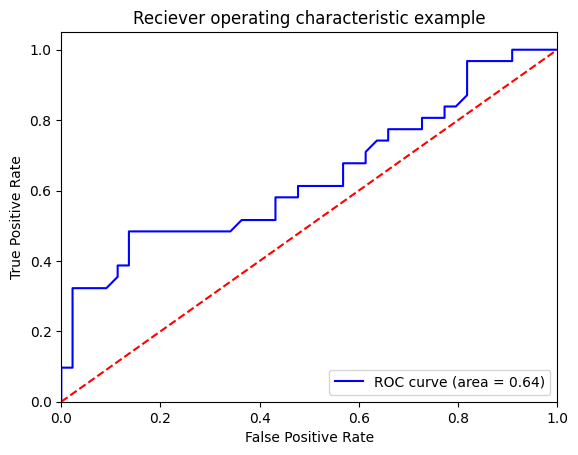

In [28]:
plt.figure()
plt.plot(fpr1, tpr1, color="blue", label = "ROC curve (area = %0.2f)" % roc_auc1)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever operating characteristic example")
plt.legend(loc = "lower right")
plt.show()

In [29]:
log_ROC_AUC = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [30]:
fpr

array([0.    , 0.    , 0.    , 0.0625, 0.0625, 0.125 , 0.125 , 0.125 ,
       0.375 , 0.375 , 0.625 , 0.75  , 1.    ])

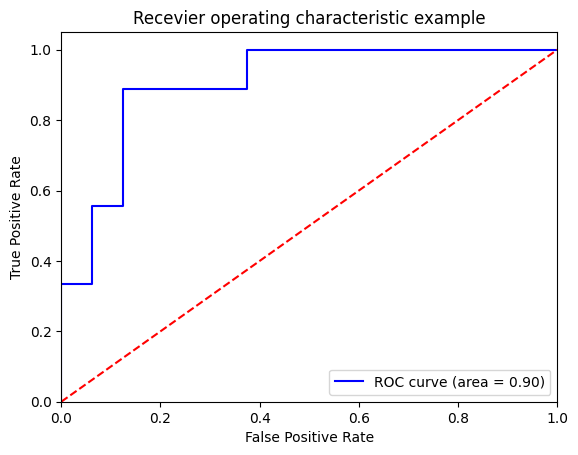

In [31]:
plt.figure()
plt.plot(fpr, tpr, color = "blue", label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recevier operating characteristic example")
plt.legend(loc = "lower right")
plt.show()

Set the threshold at 0.35

In [36]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob.reshape(1, -1), threshold=0.35)[0]

y_predict_class1

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [37]:
# converting the array from float data type to integer data type
y_predct_class1 = y_predct_class1.astype(int)
y_predct_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [38]:
confusion_matrix_2 = confusion_matrix(y_test, y_predct_class1)
print(confusion_matrix_2)

[[8 8]
 [0 9]]


In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predct_class1).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  8
False Positives:  8
False Negatives:  0
True Positives:  9


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predct_class1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.53      1.00      0.69         9

    accuracy                           0.68        25
   macro avg       0.76      0.75      0.68        25
weighted avg       0.83      0.68      0.68        25



Set the threshold at 0.50

In [42]:
from sklearn.preprocessing import binarize
y_predict_class2 = binarize(y_prob.reshape(1, -1), threshold=0.50)[0]
y_predict_class2

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0.])

In [43]:
confusion_matrix_3 = confusion_matrix(y_test, y_predict_class2)
print(confusion_matrix_3)

[[15  1]
 [ 5  4]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class2))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



Set the threshold at 0.70

In [45]:
from sklearn.preprocessing import binarize
y_predict_class3 = binarize(y_prob.reshape(1, -1), threshold=0.70)[0]
y_predict_class3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
confusion_matrix_4 = confusion_matrix(y_test, y_predict_class3)
print(confusion_matrix_4)

[[16  0]
 [ 9  0]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class3))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Find Optimal Cutoff point(Threshold value)

In [48]:
from sklearn.metrics import roc_curve, auc

In [49]:
fpr, tpr, thrasholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [51]:
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.902778


In [52]:
import numpy as np
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({"fpr" : pd.Series(fpr, index=i), "tpr" : pd.Series(tpr, index=i),
                   "1-fpr": pd.Series(1-fpr, index=i), "tf" : pd.Series(tpr -(1-fpr), index=i),
                   "thresholds" : pd.Series(thresholds, index=i)})
roc.iloc[(roc.tf - 0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.45705


[Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, ''),
 Text(12.0, 0, ''),
 Text(14.0, 0, '')]

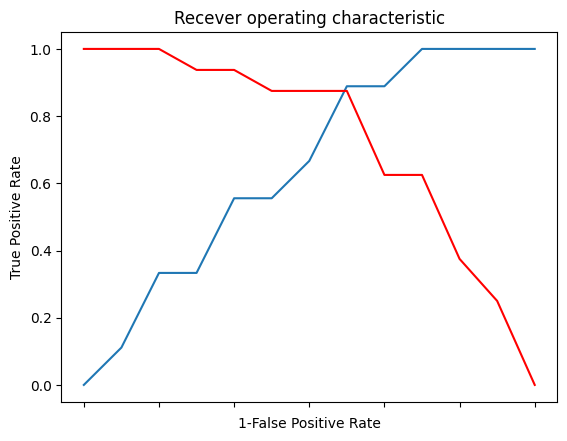

In [53]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color="red")
plt.xlabel("1-False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recever operating characteristic")
ax.set_xticklabels([])

In [54]:
from sklearn.preprocessing import binarize
y_predict_class4 = binarize(y_prob.reshape(1, -1), threshold=0.45)[0]
y_predict_class4

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [55]:
confusion_matrix_5 = confusion_matrix(y_test, y_predict_class4)
print(confusion_matrix_5)

[[14  2]
 [ 1  8]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25

